
<h2> import </h2>


In [425]:
import geemap
import os
import ee
import matplotlib.pyplot as plt
from geemap import cartoee
import cartopy.crs as ccrs
from sqlalchemy import false, true

geemap.ee_initialize()

<h3>設定年份經緯度</h3>

In [426]:
#經緯度要到小數點後面一點 
lat = -17.2853 
lon = -62.4593 
square = 0.3

#設定範圍
yMin = lat - square
xMin = lon - square
yMax = lat + square
xMax = lon + square
rectangle = ee.Geometry.Rectangle(
  [xMin, yMin, xMax, yMax]
)

#設定時間
start_year = 1984
end_year = 2012
years = ee.List.sequence(start_year, end_year)




<h3> 選取圖片 </h3>


In [427]:
def get_best_image(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = (
        ee.ImageCollection("LANDSAT/LT05/C02/T1_TOA")
        .filterBounds(rectangle)#設定範圍
        .filter(ee.Filter.calendarRange(1, 12, 'month'))#指定月份 1-12月
        .filterDate(start_date, end_date)
        .sort('CLOUD_COVER').first()#去雲
        )
    return ee.Image(image)

#圖像可視化
#https://developers.google.com/earth-engine/guides/image_visualization
vis_params = {"bands": ['B3', 'B2', 'B1'],#rbg
              "min": 0.0,
              "max": 0.4,
              "gamma" : 1.2, #亮度             
            }

collection = ee.ImageCollection(years.map(get_best_image))
image = ee.Image(collection.first())

<h3>從地圖上看選取範圍<h3>


In [428]:
#因為跑要時間所以註掉
# Map = geemap.Map()
# Map.addLayer(image, vis_params, 'First image')
# Map.setCenter(lon, lat, 8)

Map

Map(bottom=9182.0, center=[-14.997623240454423, -66.150878788875], controls=(WidgetControl(options=['position'…


<h3> 顯示圖片 </h3>


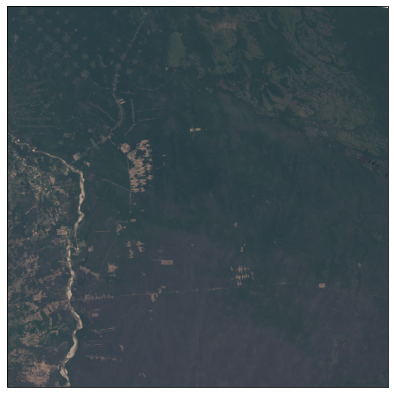

In [429]:
#設定範圍
w = 0.6
h = 0.7
region = [lon - (w-0.05), lat - h, lon + (w+0.25), lat + h]

fig = plt.figure(figsize=(10, 7))
ax = cartoee.get_map(image, region=region, vis_params=vis_params)
plt.show()

<h3>下載圖片</h3>

In [430]:
#collection.aggregate_array('system:index').getInfo()

In [431]:
#設定範圍
w = 0.5
h = 0.6
region = [lon - (w-0.05), lat - h, lon + (w+0.25), lat + h]

#設定路徑及資料夾名稱
downloads_name = str(int(lon)) +","+ str(int(lat))
downloads_path = "~/Downloads/" + downloads_name

#下載圖片 要用再解註
cartoee.get_image_collection_gif(
    ee_ic=collection,
    out_dir=os.path.expanduser(downloads_path),
    out_gif="1984-2012_timelapse.gif",
    vis_params=vis_params,
    region=region,#選取範圍
    fps=3,
    plot_title=" ",
    date_format='YYYY-MM-dd',
    fig_size=(10, 8),
    dpi_plot=100,
    file_format="png",
    verbose=True,
    )


GIF saved to C:\Users\alalala\Downloads\-62,-17\1984-2012_timelapse.gif
